In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
from shapely.geometry import Polygon

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
import pysal as ps
from spacv.grid_builder import *
from spacv.spacv import cross_val_score
import spacv

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:88: UserWarning: The Shapely GEOS version (3.7.2dev-CAPI-1.11.2 0) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
df = gpd.read_file('/opt/conda/lib/python3.7/site-packages/libpysal/examples/baltim/baltim.shp')

In [3]:
XYs = df['geometry']
X = df[['NROOM', 'DWELL', 'NBATH']]
y = df['PATIO']

In [4]:
model = LinearRegression(fit_intercept=True)

In [5]:
cv = spacv.HBLOCK(buffer_radius=0, method='random')

In [6]:
scores = cross_val_score(model, XYs, X, y, cv, mean_squared_error)

In [7]:
np.sqrt(
    np.mean(scores)
)

0.12009104502919782

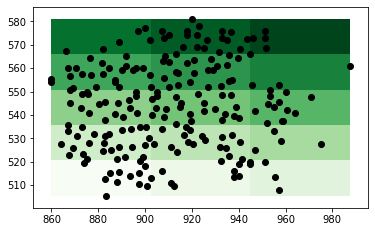

In [5]:
f, ax = plt.subplots(1)
blocks(df, tiles_x=3, tiles_y=5, method='unique').plot(column='grid_id', cmap='Greens',ax=ax)
df.plot(ax=ax, color='black')

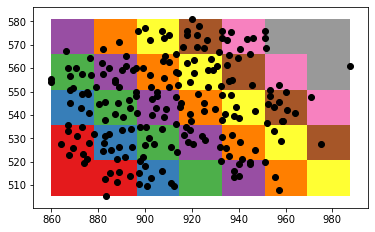

In [12]:
f, ax = plt.subplots(1)
blocks(df, method='systematic', tiles_x=7, tiles_y=5, direction='anti').plot(column='grid_id', cmap='Set1', ax=ax)
df.plot(ax=ax, color='black')

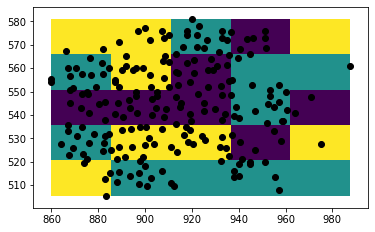

In [7]:
f, ax = plt.subplots(1)
blocks(df, method='randomized', tiles_x=5, tiles_y=5, n_groups=3).plot(column='grid_id', ax=ax)
df.plot(ax=ax, color='black')

In [37]:
from sklearn.cluster import KMeans

In [53]:
xys = df.geometry.centroid
xys = np.array(list(map(lambda x : (x.x, x.y), xys)))

k = xys.shape[0]
km = KMeans(n_clusters=k).fit(xys)

In [54]:
df['label'] = km.labels_

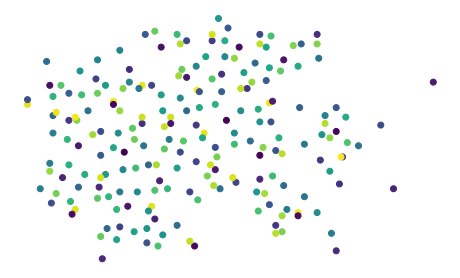

In [55]:
f, ax = plt.subplots(1, figsize=(8,8))
ax.axis('off')
df.plot(column='label', ax=ax)